In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from cartopy.mpl.ticker import LongitudeFormatter,LatitudeFormatter

In [2]:
ds = xr.open_zarr('data_fig3.zarr')

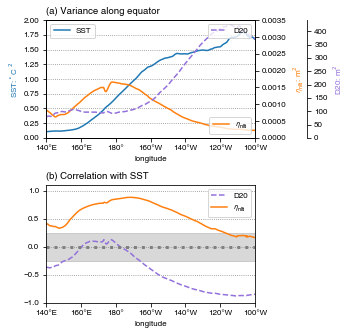

In [3]:
width = 95*0.0393700787
fig = plt.figure(figsize=(width,5.2))
plt.rcParams['font.size'] =8

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

ax1 = fig.add_subplot(211)

lon = ds.lon  
line1, = ax1.plot(lon,ds.var_SST,label='SST')
ax1.set_xlim(140,260)
ax1.set_ylim(0,2)
ax1.set_yticks(np.arange(0,2.25,0.25))  #(0,3.5,0.5)    
plt.legend(loc=2)   
ax1.set_ylabel("SST:$^\circ$C $^{2}$",color='C0'); #℃
ax1.set_xlabel('longitude');
ax1.xaxis.set_major_formatter(LongitudeFormatter())
ax1.grid(color='grey',linestyle = ':',axis='y')

ax2 = ax1.twinx()
line2, = ax2.plot(lon,ds.var_NLTI,label='$\mathregular{\eta_{nlti}}$',color='C1')
ax2.set_yticks(np.arange(0,0.004,0.0005))
ax2.set_ylabel("$\mathregular{\eta_{nlti}}$: m$^{2}$",color='C1');
ax2.set_title('')
ax2.spines['bottom'].set_position(('data', 0))
plt.legend(loc=4)

ax3 = ax1.twinx()
ax3.spines.right.set_position(("axes", 1.25))
line3, = ax3.plot(lon,ds.var_D20,label='D20',color='mediumpurple', linestyle='--')
ax3.set_yticks(np.arange(0,450,50))
ax3.set_ylabel("D20: m$^{2}$",color='mediumpurple');
ax3.set_title('')
ax3.spines['bottom'].set_position(('data', 0))
plt.legend(loc=1)
plt.title('(a) Variance along equator',loc='left') # loc='left',y=0.88


ax4 = fig.add_subplot(212)
ds.corr_d20_sst.plot(label='D20',color='mediumpurple', linestyle='--')
ds.corr_nlti_sst.plot(label='$\mathregular{\eta_{nlti}}$',color='C1')
ax4.xaxis.set_major_formatter(LongitudeFormatter())
plt.xlim(140,260)
plt.ylim(-1,1.1)
plt.legend();
plt.ylabel("");
plt.xlabel('longitude');
plt.title('(b) Correlation with SST',loc='left') #,y=0.1,loc='left'
plt.title('')
plt.axhline(y=0., c="0.5", ls=":", lw=3)
plt.grid(color='grey',linestyle = ':',axis='y')
plt.subplots_adjust(wspace =0, hspace = 0.4)
plt.fill_between(lon,-0.25,0.25,color='0.5',alpha=0.3)
plt.savefig("fig3.pdf", format="pdf", bbox_inches="tight")
plt.show()